# Lesson - Machine Learning IX:Logistic Regression for Machine Learning

Previously, we explored a supervised machine learning technique called linear regression. Linear regression works well when the target column we're trying to predict, the dependent variable, is ordered and continuous. If the target column instead contains discrete values, then linear regression isn't a good fit.

In this lesson, we'll explore how to build a predictive model for these types of problems, which are known as classification problems. In classification, our target column has a finite set of possible values which represent different categories a row can belong to. We use integers to represent the different categories so we can continue to use mathematical functions to describe how the independent variables map to the dependent variable. Here are a few examples of classification problems:

Problem	Sample Features	Type	Categories	Numerical Categories
Should we accept this student based on their graduate school application?	College GPA, SAT Score, Quality of Recommendations	Binary	Don't Accept, Accept	0, 1
What is the most likely blood type of 2 parent's offspring?	Parent 1's blood type, Parent 2's blood type.	Multi-class	A, B, AB, O	1, 2, 3, 4

We'll focus on binary classification for now, where the only 2 options for values are:

0 for the False condition,
1 for the True condition.

**Dataset**

Every year high school students and college students apply to various universities and programs. Each student has a unique set of test scores, grades, and backgrounds. Somehow, the admission commitees must decide which applicants to accept or reject from their program. In this case a binary classification algorithm can be used to accept or reject applicants. To grasp the concepts of classification, we'll try to predict whether an applicant will be admitted to a graduate program in a U.S. university.

We'll be working with a dataset containing data on 644 applicants with the following columns:

`gre` - applicant's score on the Graduate Record Exam, a generalized test for prospective graduate students.
- Score ranges from 200 to 800.
`gpa` - college grade point average.
- Continuous between 0.0 and 4.0.
`admit` - binary value
- Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected.


## Sec-I: The Logistic Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [2]:
admissions = pd.read_csv('admissions.csv')
admissions.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


In [3]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   644 non-null    int64  
 1   gpa     644 non-null    float64
 2   gre     644 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.2 KB


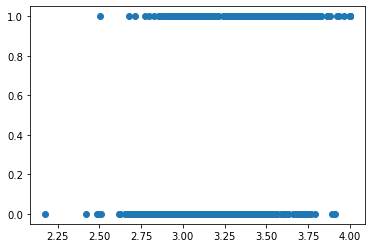

In [4]:
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

### Logistic Regression

Above, we can see that the `gpa` column and the `admit` column do not have a clear linear relationship. The `admit` column only contains the values `0` and `1` and are used to represent binary values and the numbers themselves don't carry any weight. When numbers are used to represent different options or categories, they are referred to as **categorical** values. Classification focuses on estimating the relationship between the independent variables and the dependent, categorical variable.

We'll focus on a classification technique called **logistic regression**. While a linear regression model outputs a real number as the label, a logistic regression model outputs a probability value. In binary classification, if the probability value is larger than a certain threshold probability, we assign the label for that row to `1` or `0` otherwise.

In linear regression, we used the linear function `y = mx + b` to represent the relationship between the independent variables and the dependent variable. In logistic regression, we use the logistic function, which is a version of the linear function that is adapted for classification.

Let's explore some of the logistic function's properties to better understand why it's useful for classification tasks. Unlike in linear regression, where the output can be any real value, in logistic regression the output has to be a real value between 0 and 1, since the output represents a probability value. Note that the model can't output a negative value or it would violate this criteria.

Here's the mathematical representation of the logistic function:
$$\sigma(t)=\dfrac{e^t}{1+e^t}$$

The logistic function is broken up into 2 key parts:

- The exponential transformation, transforming all values to be positive: ${e^t}$
- The normalization transformation, transforming all values to range between 0 and 1
$$\dfrac{t}{1+t}$$

The exponential transformation and the normalization forces the output values to be squeezed between 0 and 1. If we plot just the exponential part, the output values won't be limited to the range of 0 to 1:

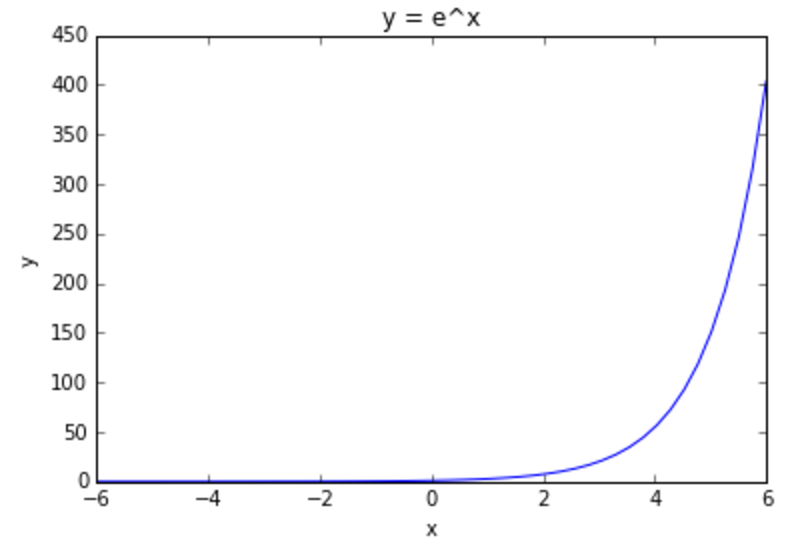





The normalization part alone unfortunately isn't sufficient since it struggles at constraining negative values:
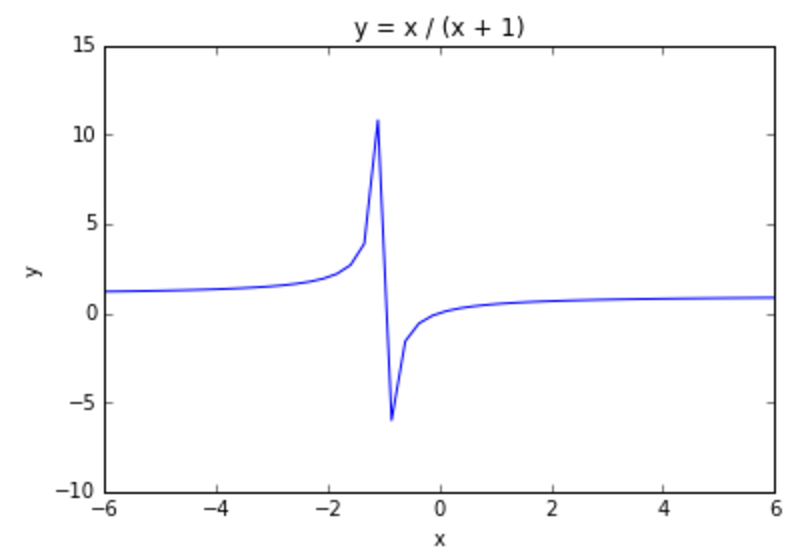

Together, both of these pieces work well to constrain the output to the range of values that probabilities are in. In the following code cell, we plot the logistic function to visualize its properties. Specifically, we:

- define the `logistic()` function using the NumPy exp function,
- generate equally spaced values, between -10 and 10 to represent the x-axis,
- calculate the y-axis values by feeding each value in x to the `logistic()` function,
- creating a line plot to visualize x and y.
= The generated plot will demonstrate that the y-axis values are constrained to range from 0 to 1. 

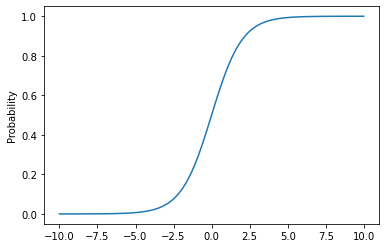

In [5]:
# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-10,10,100, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

### Training a Logistic Regression Model

We'll focus on using the scikit-learn library to fit a model between the `gpa` and `admit` columns. The `gpa` column contains the GPA of each applicant as a real value between 0.0 and 4.0 and the `admit` column specifies if that applicant was admitted (0 if not admitted and 1 if admitted). Since we're only working with one feature, `gpa`, this is referred to as a univariate model.

Training a logistic [regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) in scikit-learn is similar to training a linear regression model, with the key difference that we use the LogisticRegression class instead of the LinearRegression class. Scikit-learn was designed to make it easy to swap out models by keeping the syntax and notation as consistent as possible across its different classes.

Below, we will:
- Import the LinearRegression class and instantiate a model named linear_model.
- Import the LogisticRegression class and instantiate a model named logistic_model.
- Use the LinearRegression and LogisticRegression methods `fit` to fit the model to the data. We're only interested in constructing a model that uses gpa values to predict admit values.

In [6]:
# LinearRegression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]], admissions["admit"])

LinearRegression()

In [7]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression()

**Predicting Probabilities**

The output of a logistic regression model is the probability that the row should be labelled as True, or in our case 1. We can use the trained model to return the predicted probability for each row in the training data.

To return the predicted probability, use the [`predict_proba` method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba). The only required parameter for this method is the `num_features` by `num_sample` matrix of observations we want scikit-learn to return predicted probabilities for. For each input row, scikit-learn will return a NumPy array with 2 probability values:

- the probability that the row should be labelled `0`,
- the probability that the row should be labelled `1`.
Since `0` and `1` are the only 2 possible categories and represent the entire outcome space, these 2 probabilities will always add upto 1.

```
probabilities = logistic_model.predict_proba(admissions[["gpa"]])
# Probability that the row belongs to label `0`.
probabilities[:,0]
# Probabililty that the row belongs to label `1`.
probabilities[:,1]
```

Below, we will:
- Use the `LogisticRegression` method `predict_proba` to return the predicted probabilities for the data in the `gpa` column. - - Assign the returned probabilities to `pred_probs`.

Create and display a scatter plot using the Matplotlib scatter function where:

- the x-axis is the values in the `gpa` column,
- the y-axis is the probability of being classified as `label` 1

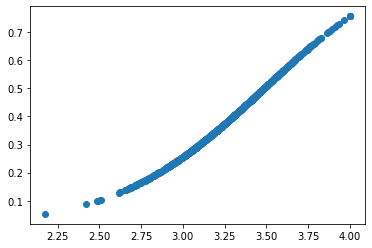

In [8]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
plt.scatter(admissions["gpa"], pred_probs[:,1])

**Predicting Labels**

We can notice that the scatter plot suggests a linear relationship between the `gpa` values and the probability of being admitted. This is because logistic regression is really just an adapted version of linear regression for classification problems. Both logistic and linear regression are used to capture linear relationships between the independent variables and the dependent variable.

Let's now use the `predict` method to return the label predictions for each row in our training dataset. Below, we will:

- Use the LogisticRegression method [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) to return the predicted for each label in the training set.

The parameter for the `predict` method matches that of the `predict_proba` method:
 - X: rows of data to use for prediction.
- Assign the result to `fitted_labels`.
Create and display a scatter plot using the Matplotlib scatter function where:

- the x-axis is the values in the `gpa` column,
- the y-axis is `fitted_labels`

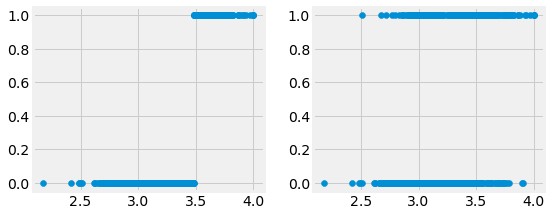

In [9]:
# Predict labels using only gpa
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
fitted_labels_one = logistic_model.predict(admissions[["gpa"]])
fig = plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
# Plot fitted labels        
ax1.scatter(admissions["gpa"], fitted_labels_one)
# Also plot actual labels
ax2.scatter(admissions['gpa'], admissions['admit'])
plt.tight_layout()

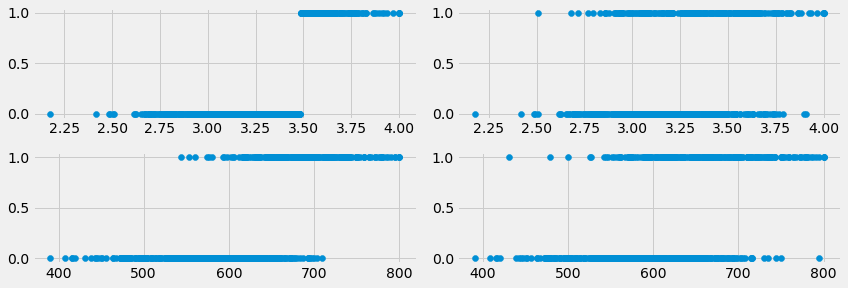

In [10]:
# Predict labels using both gpa and gre
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa", "gre"]], admissions["admit"])
fitted_labels_two = logistic_model.predict(admissions[["gpa", "gre"]])
fig = plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
# Plot fitted labels versus gpa        
ax1.scatter(admissions["gpa"], fitted_labels_one)
# Also plot actual labels versus gpa
ax2.scatter(admissions['gpa'], admissions['admit'])
# Plot fitted labels versus gre        
ax3.scatter(admissions["gre"], fitted_labels_two)
# Also plot actual labels versus gre
ax4.scatter(admissions['gre'], admissions['admit'])
plt.tight_layout()

## Sec-II: Evaluating Binary Classifiers

Below, we add to the dataset two columns, `predicted_one` based only on `gpa`, and `predicted_two`, based on both `gpa` and `gre`. Then we will calculate the sum of these columns and compare it with the `admit` column. It may be noted that this is not a measure of overall accuracy as it is not a comparison on a per-row basis. 

In [11]:
# Adding prediction labels to the dataset both with one and two features used
admissions['actual_labels'] = admissions['admit']
admissions['predicted_one'] = fitted_labels_one
admissions['predicted_two'] = fitted_labels_two
# Determine accuracy
print('actual: ', '\n', admissions['actual_labels'].value_counts())
print('predicted_one: ', '\n', admissions['predicted_one'].value_counts())
print('predicted_two: ', '\n', admissions['predicted_two'].value_counts())

actual:  
 0    400
1    244
Name: actual_labels, dtype: int64
predicted_one:  
 0    507
1    137
Name: predicted_one, dtype: int64
predicted_two:  
 0    423
1    221
Name: predicted_two, dtype: int64


### Accuracy
Above gives an overall idea, but the way to determine the effectiveness of a classification model is prediction accuracy. Accuracy helps us answer the question:

What fraction of the predictions were correct (actual label matched predicted label)?
Prediction accuracy boils down to the number of labels that were correctly predicted divided by the total number of observations:
$$Accuracy = \dfrac{\text{# of Correctly Predicted}}{\text{# of Observations}}$$

In logistic regression, the model's output is a probability between 0 and 1. To decide who gets admitted, we set a threshold and accept all of the students where their computed probability exceeds that threshold. This threshold is called the discrimination threshold and scikit-learn sets it to 0.5 by default when predicting labels. If the predicted probability is greater than 0.5, the label for that observation is 1. If it is instead less than 0.5, the label for that observation is 0.

An accuracy of 1.0 means that the model predicted 100% of admissions correctly for the given discrimination threshold. An accuracy of 0.2 means that the model predicted 20% of the admissions correctly.

Below we will:
- Compare the predicted_label column with the actual_label columns.
- Use a double equals sign `(==)` to compare the 2 Series objects and assign the resulting Series object to `matches_one` and `matches_two`.
- Use conditional filtering to filter admissions to just the rows where matches is True. Assign the resulting Dataframe to `correct_predictions`.
- Display the first 5 rows in `correct_predictions` to make sure the values in the predicted_label and actual_label columns are equal.
- Calculate the accuracy and assign the resulting float value to `accuracy`.
- Display `accuracy` using the print function.

In [12]:
admissions['matches_one'] = admissions['actual_labels'] == admissions['predicted_one']
admissions['matches_two'] = admissions['actual_labels'] == admissions['predicted_two']
correct_predictions_one = admissions[admissions['matches_one'] == True].drop(['matches_two', 'predicted_two'], axis=1)
correct_predictions_two = admissions[admissions['matches_two'] == True].drop(['matches_one', 'predicted_one'], axis=1)
# correct_predictions_two = admissions[admissions['matches_two'] == True]


In [13]:
print(correct_predictions_one.head())

   admit       gpa         gre  actual_labels  predicted_one  matches_one
0      0  3.177277  594.102992              0              0         True
1      0  3.412655  631.528607              0              0         True
2      0  2.728097  553.714399              0              0         True
3      0  3.093559  551.089985              0              0         True
4      0  3.141923  537.184894              0              0         True


In [14]:
print(correct_predictions_two.head())

   admit       gpa         gre  actual_labels  predicted_two  matches_two
0      0  3.177277  594.102992              0              0         True
2      0  2.728097  553.714399              0              0         True
3      0  3.093559  551.089985              0              0         True
4      0  3.141923  537.184894              0              0         True
5      0  3.599108  442.763567              0              0         True


In [15]:
# Determine Accuracy
accuracy_one = len(correct_predictions_one)/ len(admissions)
accuracy_two = len(correct_predictions_two)/ len(admissions)
print(accuracy_one, accuracy_two)

0.6847826086956522 0.7872670807453416


### Binary Classification Outcomes
The accuracy doesn't tell us how the model performs on data it wasn't trained on. A model that returns a 100% accuracy when evaluated on it's training set doesn't tell us how well the model works on data it's never seen before (and wasn't trained on). Accuracy also doesn't help us discriminate between the different types of outcomes a binary classification model can make.

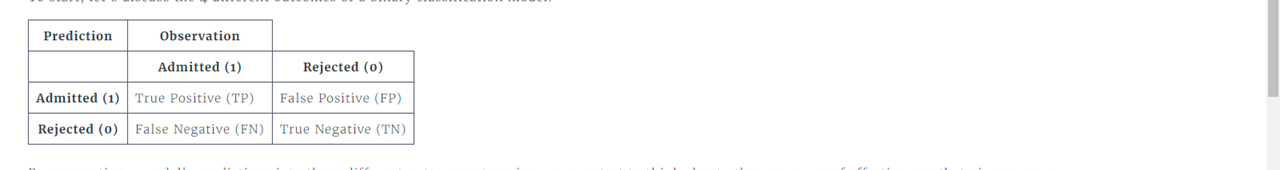

By segmenting a model's predictions into these different outcome categories, we can start to think about other measures of effectiveness that give us more granularity than simple accuracy.

We can define these outcomes as:

True Positive - The model correctly predicted that the student would be admitted.

- Said another way, the model predicted that the label would be Positive, and that ended up being `True`.
- In our case, Positive refers to being admitted and maps to the label `1` in the dataset.
- For these dataset, a true positive is whenever `predicted_label` is `1` and actual_label is `1`.

True Negative - The model correctly predicted that the student would be rejected.

- Said another way, the model predicted that the label would be Negative, and that ended up being `True`.
- In our case, Negative refers to being rejected and maps to the label `0` in the dataset.
- For this dataset, a true negative is whenever predicted_label is `0` and actual_label is `0`.

False Positive - The model incorrectly predicted that the student would be admitted even though the student was actually rejected.

- Said another way, the model predicted that the label would be Positive, but that was `False` (the actual label was False).
- For this dataset, a false positive is whenever predicted_label is `1` but the actual_label is `0`.

False Negative - The model incorrectly predicted that the student would be rejected even though the student was actually admitted.

- Said another way, the model predicted that the label would be Negative, but that was `False` (the actual value was True).
- For this dataset, a false negative is whenever predicted_label is `0` but the actual_label is `1`.

**Exercise**

- Extract all of the rows where `predicted_label` and `actual_label` both equal 1. Then, calculate the number of true positives and assign to `true_positives`.

- Extract all of the rows where `predicted_label` and `actual_label` both equal `0`. Then, calculate the number of true negatives and assign to `true_negatives`.

- Display both `true_positives` and `true_negatives`.

We will work with admissions dataset but only for `predicted_label_2`

In [17]:
true_positive_filter = (admissions["predicted_one"] == 1) & (admissions["actual_labels"] == 1)
true_positives_one = len(admissions[true_positive_filter])

true_negative_filter = (admissions["predicted_one"] == 0) & (admissions["actual_labels"] == 0)
true_negatives_one = len(admissions[true_negative_filter])

print(true_positives_one)
print(true_negatives_one)

89
352


In [18]:
true_positive_filter = (admissions["predicted_two"] == 1) & (admissions["actual_labels"] == 1)
true_positives_two = len(admissions[true_positive_filter])

true_negative_filter = (admissions["predicted_two"] == 0) & (admissions["actual_labels"] == 0)
true_negatives_two = len(admissions[true_negative_filter])

print(true_positives_two)
print(true_negatives_two)

164
343


### Sensitivity
Sensitivity or True Positive Rate - The proportion of applicants that were correctly admitted:

$$TPR=\dfrac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$
Of all of the students that should have been admitted (True Positives + False Negatives), what fraction did the model correctly admit (True Positives)? More generally, this measure helps us answer the question:

**How effective is this model at identifying positive outcomes?**
In our case, the positive outcome (label of 1) is admitting a student. If the True Positive Rate is low, it means that the model isn't effective at catching positive cases. For certain problems, **high sensitivity** is incredibly important. If we're building a model to predict which patients have cancer, every patient that is missed by the model could mean a loss of life. We want a highly sensitive model that is able to "catch" all of the positive cases (in this case, the positive case is a patient with cancer).

**Exercise**

- Calculate the number of false negatives (where the model predicted rejected but the student was actually admitted) and assign to `false_negatives`.
- Calculate the sensitivity and assign the computed value to `sensitivity`.
- Display `sensitivity`



In [19]:
false_negative_filter = (admissions["predicted_one"] == 0) & (admissions["actual_labels"] == 1)
false_negatives_one = len(admissions[false_negative_filter])

sensitivity_one = true_positives_one / (true_positives_one + false_negatives_one)

print(sensitivity_one)

0.36475409836065575


In [20]:
false_negative_filter = (admissions["predicted_two"] == 0) & (admissions["actual_labels"] == 1)
false_negatives_two = len(admissions[false_negative_filter])

sensitivity_two = true_positives_two / (true_positives_two + false_negatives_two)

print(sensitivity_two)

0.6721311475409836


### Specificity

The sensitivity of the models is around 36.4% and 67% respectively, and respectively about 1 in 3 and 2 in 3 students that should have been admitted were actually admitted. In the context of predicting student admissions, this probably isn't too bad  Graduate schools can only admit a select number of students into their programs and by definition they end up rejecting many qualified students that would have succeeded.

In the healthcare context, however, low sensitivity could mean a severe loss of life. If a classification model is only catching 35.4% of positive cases for an illness, then around 7 of 8 people are going undiagnosed (being classified as false negatives).

Let's now discuss **specificity**:

Specificity or True Negative Rate - The proportion of applicants that were correctly rejected:
$$TNR=\dfrac{\text{True Negatives}}{\text{False Positives} + \text{True Negatives}}$$

This helps us answer the question:

- **How effective is this model at identifying negative outcomes?**
In our case, the specificity tells us the proportion of applicants who should be rejected (actual_label equal to 0, which consists of False Positives + True Negatives) that were correctly rejected (just True Negatives). A high specificity means that the model is really good at predicting which applicants should be rejected.

**Exercise**
- Calculate the number of false positives (where the model predicted admitted but the student was actually rejected) and assign to false_positives.
- Calculate the specificity and assign the computed value to `specificity`.
- Display `specificity`.

In [22]:
false_positive_filter = (admissions["predicted_one"] == 1) & (admissions["actual_labels"] == 0)
false_positives_one = len(admissions[false_positive_filter])

specificity_one = true_negatives_one / (false_positives_one + true_negatives_one)

print(specificity_one)

0.88


In [24]:
false_positive_filter = (admissions["predicted_two"] == 1) & (admissions["actual_labels"] == 0)
false_positives_two = len(admissions[false_positive_filter])

specificity_two = true_negatives_two / (false_positives_two + true_negatives_two)

print(specificity_two)

0.8575


## Sec-III: Multiclass Classification

### Dataset
The dataset we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, and how fast the car accelerates. Using this information we will predict the origin of the vehicle, either North America, Europe, or Asia. We can see, that unlike our previous classification datasets, we have three categories to choose from, making our task slightly more challenging.

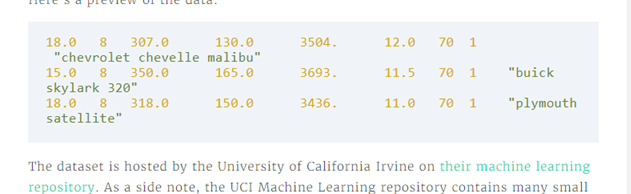

The dataset is hosted by the University of California Irvine on their [machine learning repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) As a side note, the UCI Machine Learning repository contains many small datasets which are useful when getting our hands dirty with machine learning.

Here are the columns in the dataset:

`mpg` -- Miles per gallon, Continuous.
`cylinders` -- Number of cylinders in the motor, Integer, Ordinal, and Categorical.
`displacement` -- Size of the motor, Continuous.
`horsepower` -- Horsepower produced, Continuous.
`weight` -- Weights of the car, Continuous.
`acceleration` -- Acceleration, Continuous.
`year` -- Year the car was built, Integer and Categorical.
`origin` -- Integer and Categorical. 1: North America, 2: Europe, 3: Asia

**Exercise**

- read auto.csv into a Dataframe named `cars`.

- Use the `Series.unique()` method to assign the unique elements in the column origin to `unique_regions`. Then use the print function to display unique_regions.

In [25]:
cars = pd.read_csv("auto.csv")
print(cars.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0  3504.0          12.0    70   
1  15.0          8         350.0       165.0  3693.0          11.5    70   
2  18.0          8         318.0       150.0  3436.0          11.0    70   
3  16.0          8         304.0       150.0  3433.0          12.0    70   
4  17.0          8         302.0       140.0  3449.0          10.5    70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  


In [26]:
unique_regions = cars["origin"].unique()
print(unique_regions)

[1 3 2]


### Dummy Variables
In many cases, like with this dataset, we'll have to create numeric representation of categorical values ourselves. For this dataset, categorical variables exist in three columns, `cylinders`, `year`, and `origin`.

Even though the column year is populated with numbers, we’re going to treat them like categories. The year 71 is unlikely to relate to the year 70 in the same way those two numbers do numerically, but rather just as two different labels. In these instances, it is always safer to treat discrete values as categorical variables.

We must use dummy variables for columns containing categorical values. Whenever we have more than 2 categories, we need to create more columns to represent the categories. Since we have 5 different categories of cylinders, we could use 3, 4, 5, 6, and 8 to represent the different categories. We can split the column into separate binary columns:

`cyl_3` -- Does the car have 3 cylinders? 0 if False, 1 if True.
`cyl_4` -- Does the car have 4 cylinders? 0 if False, 1 if True.
`cyl_5` -- Does the car have 5 cylinders? 0 if False, 1 if True.
`cyl_6` -- Does the car have 6 cylinders? 0 if False, 1 if True.
`cyl_8` -- Does the car have 8 cylinders? 0 if False, 1 if True.

We can use the pandas.`get_dummies()` function to return a Dataframe containing binary columns from the values in the cylinders column. In addition, if we set the prefix parameter to `cyl`, Pandas will pre-pend the column names to match the style we'd like:
```
dummy_df = pd.get_dummies(cars["cylinders"], prefix="cyl")
```

We then use the `pandas.concat()` function to add the columns from this Dataframe back to cars:
```
cars = pd.concat([cars, dummy_df], axis=1)

```


**Exercise**

- Use the `pandas.get_dummies()` function to create dummy values from the `car` and `year` columns.

- Use the prefix attribute to prepend year to each of the resulting column names.
- Assign the resulting Dataframe to `dummy_cylinders` and `dummy_years`.
- Use the pandas.concat() function to concatenate the columns from `dummy_cylinders` and `dummy_years` to `cars`.

- Use the `DataFrame.drop()` method to drop the year and cylinders columns from cars.

- Display the first 5 rows of the new cars Dataframe to confirm.

In [27]:
dummy_cylinders = pd.get_dummies(cars["cylinders"], prefix="cyl")
cars = pd.concat([cars, dummy_cylinders], axis=1)

In [28]:
dummy_years = pd.get_dummies(cars["year"], prefix="year")
cars = pd.concat([cars, dummy_years], axis=1)
cars = cars.drop("year", axis=1)
cars = cars.drop("cylinders", axis=1)


In [29]:
print(cars.head())

    mpg  displacement  horsepower  weight  acceleration  origin  cyl_3  cyl_4  \
0  18.0         307.0       130.0  3504.0          12.0       1      0      0   
1  15.0         350.0       165.0  3693.0          11.5       1      0      0   
2  18.0         318.0       150.0  3436.0          11.0       1      0      0   
3  16.0         304.0       150.0  3433.0          12.0       1      0      0   
4  17.0         302.0       140.0  3449.0          10.5       1      0      0   

   cyl_5  cyl_6  cyl_8  year_70  year_71  year_72  year_73  year_74  year_75  \
0      0      0      1        1        0        0        0        0        0   
1      0      0      1        1        0        0        0        0        0   
2      0      0      1        1        0        0        0        0        0   
3      0      0      1        1        0        0        0        0        0   
4      0      0      1        1        0        0        0        0        0   

   year_76  year_77  year_78  ye

### Multiclass Classification - One versus Rest (OVR)

In previous missions, we explored binary classification, where there were only 2 possible categories, or classes. When we have 3 or more categories, we call the problem a multiclass classification problem. There are a few different methods of doing multiclass classification and here, we'll focus on the one-versus-all method.

The one-versus-all method is a technique where we choose a single category as the Positive case and group the rest of the categories as the False case. We're essentially splitting the problem into multiple binary classification problems. For each observation, the model will then output the probability of belonging to each category.

**Exercise**
- To start we have to split our data into a training and test set. First, we have to randomize the `cars` Dataframe f to start things off and assign the shuffled Dataframe to `shuffled_cars`.
- Split the shuffled_cars Dataframe into 2 Dataframes: `train` and `test`.
- Assign the first 70% of the `shuffled_cars` to `train`.
- Assign the last 30% of the `shuffled_cars` to `test`.

In [30]:
shuffled_rows = np.random.permutation(cars.index)
shuffled_cars = cars.iloc[shuffled_rows]

In [31]:
highest_train_row = int(cars.shape[0] * .70)
train = shuffled_cars.iloc[0:highest_train_row]
test = shuffled_cars.iloc[highest_train_row:]

### Training a Multiclass Logistic Regression Model
In the one-vs-all approach, we're essentially converting an n-class (in our case n is 3) classification problem into n binary classification problems. For our case, we'll need to train 3 models:
- A model where all cars built in North America are considered Positive (`1`) and those built in Europe and Asia are considered Negative (`0`).
- A model where all cars built in Europe are considered Positive (`1`) and those built in North America and Asia are considered Negative (`0`).
- A model where all cars built in Asia are labeled Positive (`1`) and those built in North America and Europe are considered Negative (`0`).

Each of these models is a binary classification model that will return a probability between `0` and `1`. When we apply this model on new data, a probability value will be returned from each model (3 total). For each observation, we choose the label corresponding to the model that predicted the highest probability.

We'll use the dummy variables we created from the `cylinders` and `year` columns to train 3 models using the LogisticRegression class from scikit-learn.

**Exercise**
For each value in `unique_origins`, train a logistic regression model with the following parameters:

`X`: Dataframe containing just the cylinder & year binary columns.
`y`: list (or Series) of Boolean values:
`True` if observation's value for `origin` matches the current iterator variable.
`False` if observation's value for `origin` doesn't match the current iterator variable.
Add each model to the models dictionary with the following structure:
`key`: origin value (`1`, `2`, or `3`),
`value`: relevant LogisticRegression model instance.

In [35]:
unique_origins = cars["origin"].unique()
unique_origins.sort()
models = {}
features = [c for c in train.columns if c.startswith("cyl") or c.startswith("year")]
for origin in unique_origins:
    model = LogisticRegression()
    
    X_train = train[features]
    y_train = train["origin"] == origin

    model.fit(X_train, y_train)
    models[origin] = model
models    

{1: LogisticRegression(), 2: LogisticRegression(), 3: LogisticRegression()}

### Testing the Model

For each origin value from `unique_origins`:

- Use the LogisticRegression `predict_proba` function to return the 3 lists of predicted probabilities for the test set and add to the `testing_probs` Dataframe.

In [37]:
testing_probs = pd.DataFrame(columns=unique_origins)
for origin in unique_origins:
    # Select testing features.
    X_test = test[features]   
    # Compute probability of observation being in the origin.
    testing_probs[origin] = models[origin].predict_proba(X_test)[:,1]
testing_probs.tail()    

,1,2,3
113,0.974932,0.012365,0.029057
114,0.869500,0.046089,0.075141
115,0.929145,0.009692,0.118748
116,0.309945,0.380002,0.295838
117,0.984162,0.013536,0.015822


### Choose the Origin

Now that we trained the models and computed the probabilities in each origin we can classify each observation. To classify each observation we want to select the origin with the highest probability of classification for that observation.

While each column in our dataframe `testing_probs` represents an origin we just need to choose the one with the largest probability. We can use the Dataframe method [`.idxmax()`]( to return a Series where each value corresponds to the column or where the maximum value occurs for that observation. We need to make sure to set the axis paramater to 1 since we want to calculate the maximum value across columns. Since each column maps directly to an origin the resulting Series will be the classification from our model.

In [38]:
predicted_origins = testing_probs.idxmax(axis=1)
print(predicted_origins)

0      2
1      3
2      1
3      1
4      1
5      1
6      3
7      1
8      1
9      2
10     2
11     3
12     1
13     1
14     3
15     2
16     2
17     1
18     3
19     1
20     1
21     2
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     3
31     2
32     1
33     1
34     1
35     1
36     3
37     1
38     2
39     1
40     1
41     3
42     1
43     1
44     1
45     1
46     3
47     1
48     3
49     3
50     2
51     1
52     2
53     1
54     1
55     1
56     1
57     1
58     3
59     1
60     3
61     3
62     2
63     1
64     1
65     1
66     1
67     2
68     1
69     1
70     2
71     1
72     2
73     1
74     3
75     1
76     1
77     1
78     3
79     1
80     1
81     1
82     1
83     2
84     3
85     1
86     3
87     1
88     2
89     1
90     1
91     1
92     3
93     2
94     1
95     3
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    2
108    2
109    1
110    1
1